In [2]:
import pandas as pd
import nx2pd as nx 
from matplotlib import pyplot as plt
import matplotlib.dates as md


>>> Loading nx2pd.py version of 24.10.2022 @ 03:17PM



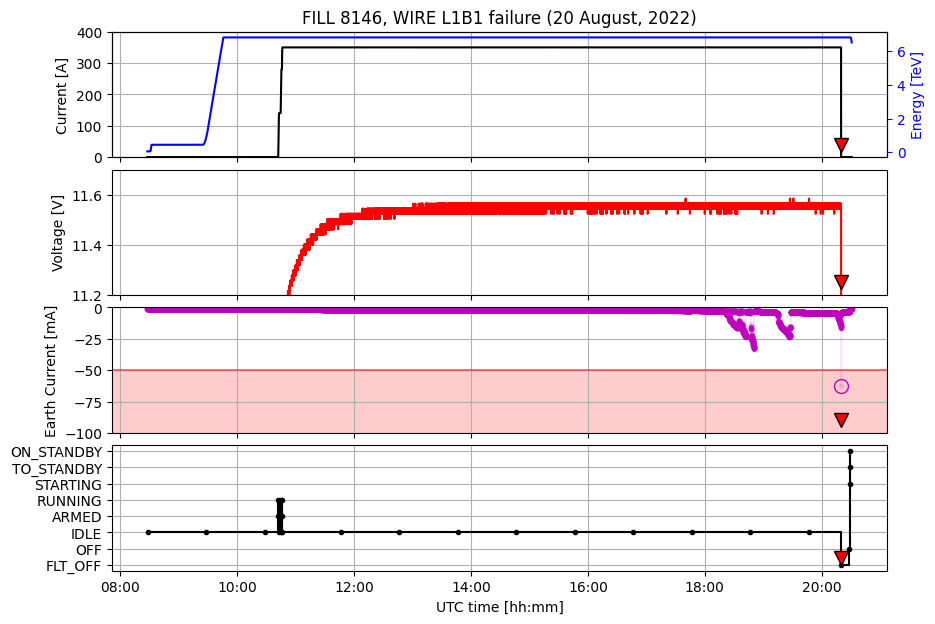

In [6]:
df = pd.read_parquet('BBLR F8146.parquet').sort_index()
nx.pandas_index_localize(df);
my_dict={'FLT_OFF': -1,
             'OFF': 0,
             'IDLE': 1,
             'ARMED':2,
             'RUNNING': 3,
             'STARTING': 4,
             'TO_STANDBY':5,
             'ON_STANDBY': 6}
def string_to_number(x):
    return my_dict[x]

fig = plt.figure(figsize=[10,7])
gs = fig.add_gridspec(4, hspace=0.1)
axs = gs.subplots(sharex=True)

aux = df['RPMC.UL14.RBBCW.L1B1:I_MEAS'].dropna()
axs[0].plot(aux, 'k')
axs[0].set_ylabel('Current [A]')
axs[0].set_ylim(0,400)
axs[0].set_title(f'FILL 8146, WIRE L1B1 failure ({pd.Timestamp(aux.index.values[0]).strftime("%d %B, %Y")})')
axs[0].grid(True)

if True: 
    ax_0_1 = axs[0].twinx()
    ax_0_1.set_ylabel('Energy [TeV]')
    p, = ax_0_1.plot(df['LHC.BCCM.B1.A:BEAM_ENERGY'].dropna()/1000,'b')
    ax_0_1.yaxis.label.set_color(p.get_color())
    ax_0_1.tick_params(axis='y', colors=p.get_color())

aux = df['RPMC.UL14.RBBCW.L1B1:V_MEAS'].dropna()
axs[1].plot(aux, 'r-')
axs[1].set_ylabel('Voltage [V]')
axs[1].set_ylim([11.2,11.7])
axs[1].grid(True)

aux = df['RPMC.UL14.RBBCW.L1B1:I_EARTH_PCNT'].dropna()/10000*50
axs[2].plot(aux, 'm.-', alpha=.1)
axs[2].set_ylabel('Earth Current [mA]')
axs[2].set_ylim(-100,0)
axs[2].axhline(-50, color='r', alpha=0.5)
axs[2].axhspan(-50,-100, facecolor='r', alpha=0.2)
axs[2].plot(aux[aux<-50],'or',ms=10,markerfacecolor='None',markeredgecolor='m')
axs[2].grid(True)

aux = df['RPMC.UL14.RBBCW.L1B1:STATE'].dropna().apply(string_to_number)
axs[3].step(aux.index, aux.values, marker = '.',  where='post',color='k')
axs[3].set_yticks([-1,0,1,2,3,4,5,6], my_dict.keys());
axs[3].grid(True)
axs[3].set_xlabel('UTC time [hh:mm]')

aux = df['RBBCW.L1B1:ST_FAILURE_WIC'].dropna()
for ii in axs:
    for x in aux[aux==0].index:
        ii.plot(x,ii.get_ylim()[0]+.1*(-ii.get_ylim()[0]+ii.get_ylim()[1]), 'vr', ms=10, mec='k')
xfmt = md.DateFormatter('%H:%M')
axs[3].xaxis.set_major_formatter(xfmt)

plt.savefig('./figures/L1B1_failure.png', dpi=300)


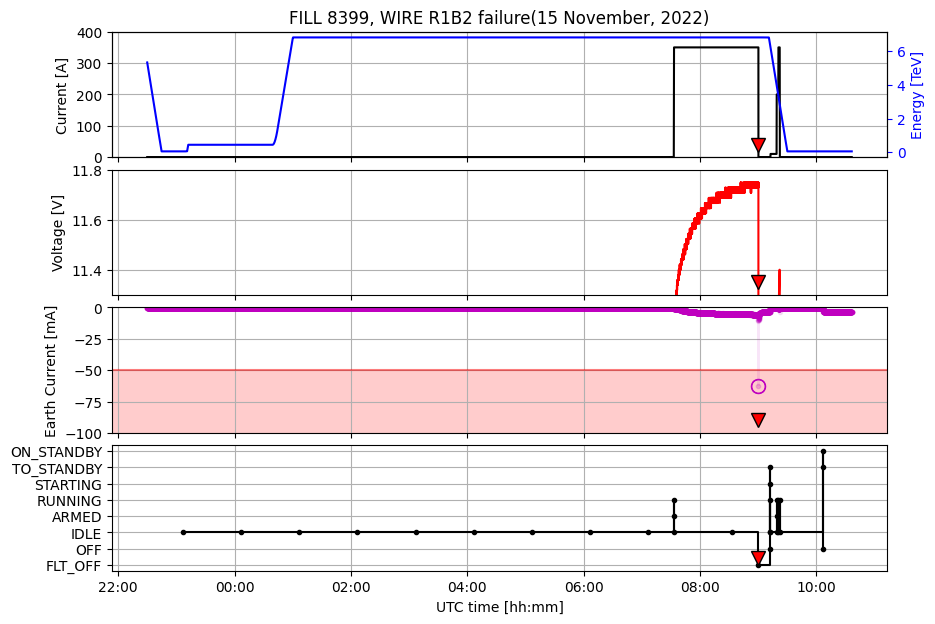

In [7]:
df = pd.read_parquet('BBLR F8399.parquet').sort_index()
nx.pandas_index_localize(df);
my_dict={'FLT_OFF': -1,
             'OFF': 0,
             'IDLE': 1,
             'ARMED':2,
             'RUNNING': 3,
             'STARTING': 4,
             'TO_STANDBY':5,
             'ON_STANDBY': 6}
def string_to_number(x):
    return my_dict[x]

fig = plt.figure(figsize=[10,7])
gs = fig.add_gridspec(4, hspace=0.1)
axs = gs.subplots(sharex=True)

aux = df['RPMC.UL16.RBBCW.R1B2:I_MEAS'].dropna()
axs[0].plot(aux, 'k')
axs[0].set_ylabel('Current [A]')
axs[0].set_ylim(0,400)
axs[0].set_title(f'FILL 8399, WIRE R1B2 failure({pd.Timestamp(aux.index.values[0]).strftime("%d %B, %Y")})')

axs[0].grid(True)

if True: 
    ax_0_1 = axs[0].twinx()
    ax_0_1.set_ylabel('Energy [TeV]')
    p, = ax_0_1.plot(df['LHC.BCCM.B1.A:BEAM_ENERGY'].dropna()/1000,'b')
    ax_0_1.yaxis.label.set_color(p.get_color())
    ax_0_1.tick_params(axis='y', colors=p.get_color())

aux = df['RPMC.UL16.RBBCW.R1B2:V_MEAS'].dropna()
axs[1].plot(aux, 'r-')
axs[1].set_ylabel('Voltage [V]')
axs[1].set_ylim([11.3,11.8])
axs[1].grid(True)

aux = df['RPMC.UL16.RBBCW.R1B2:I_EARTH_PCNT'].dropna()/10000*50
axs[2].plot(aux, 'm.-', alpha=.1)
axs[2].set_ylabel('Earth Current [mA]')
axs[2].set_ylim(-100,0)
axs[2].axhline(-50, color='r', alpha=0.5)
axs[2].axhspan(-50,-100, facecolor='r', alpha=0.2)
axs[2].plot(aux[aux<-50],'or',ms=10,markerfacecolor='None',markeredgecolor='m')
axs[2].grid(True)

aux = df['RPMC.UL16.RBBCW.R1B2:STATE'].dropna().apply(string_to_number)
axs[3].step(aux.index, aux.values, marker = '.',  where='post',color='k')
axs[3].set_yticks([-1,0,1,2,3,4,5,6], my_dict.keys());
axs[3].grid(True)
axs[3].set_xlabel('UTC time [hh:mm]')

aux = df['RBBCW.R1B2:ST_FAILURE_WIC'].dropna()
for ii in axs:
    for x in aux[aux==0].index:
        ii.plot(x,ii.get_ylim()[0]+.1*(-ii.get_ylim()[0]+ii.get_ylim()[1]), 'vr', ms=10, mec='k')

xfmt = md.DateFormatter('%H:%M')
axs[3].xaxis.set_major_formatter(xfmt)

plt.savefig('./figures/R1B2_failure.png', dpi=300)

RPMC.UL14.RBBCW.L1B1:STATE
2022-07-13 14:53:25.580000+00:00                    FLT_OFF
2022-07-13 23:37:55.580000+00:00                    FLT_OFF
2022-08-20 20:19:48.580000+00:00                    FLT_OFF
2022-08-22 15:26:42.080000+00:00                    FLT_OFF
2022-08-22 16:59:03.580000+00:00                    FLT_OFF
2022-08-22 19:13:29.080000+00:00                    FLT_OFF
2022-09-13 08:36:37.080000+00:00                    FLT_OFF
2022-09-15 13:00:53.580000+00:00                    FLT_OFF
2022-09-15 14:00:53.580000+00:00                    FLT_OFF
2022-09-15 15:00:53.580000+00:00                    FLT_OFF
2022-09-15 16:00:53.580000+00:00                    FLT_OFF
2022-09-15 17:00:53.580000+00:00                    FLT_OFF
2022-09-15 18:00:53.580000+00:00                    FLT_OFF
2022-09-15 19:00:53.580000+00:00                    FLT_OFF
2022-09-15 20:00:53.580000+00:00                    FLT_OFF
2022-09-15 21:00:53.580000+00:00                    FLT_OFF
2022-09-15 22:00:53.580000+00:00                    FLT_OFF
2022-09-15 23:00:53.580000+00:00                    FLT_OFF
2022-09-16 00:00:53.580000+00:00                    FLT_OFF
2022-09-16 01:00:53.580000+00:00                    FLT_OFF
2022-09-16 02:00:53.580000+00:00                    FLT_OFF
2022-09-16 03:00:53.580000+00:00                    FLT_OFF
2022-09-16 04:00:53.580000+00:00                    FLT_OFF
2022-09-16 05:00:53.580000+00:00                    FLT_OFF
2022-09-19 22:59:11.080000+00:00                    FLT_OFF
2022-09-20 01:05:15.580000+00:00                    FLT_OFF
2022-09-20 14:51:10.580000+00:00                    FLT_OFF
2022-10-30 12:04:09.080000+00:00                    FLT_OFF
2022-10-30 13:04:09.080000+00:00                    FLT_OFF
2022-10-30 14:04:09.080000+00:00                    FLT_OFF
2022-10-30 15:04:09.080000+00:00                    FLT_OFF
2022-10-30 16:04:09.080000+00:00                    FLT_OFF
2022-10-30 17:04:09.080000+00:00                    FLT_OFF
2022-10-30 18:04:09.080000+00:00                    FLT_OFF
2022-10-30 19:04:09.080000+00:00                    FLT_OFF
2022-10-30 20:04:09.080000+00:00                    FLT_OFF
2022-10-30 21:04:09.080000+00:00                    FLT_OFF
2022-10-30 22:04:09.080000+00:00                    FLT_OFF
2022-11-22 11:05:41.580000+00:00                    FLT_OFF
2022-11-22 14:28:29.580000+00:00                    FLT_OFF

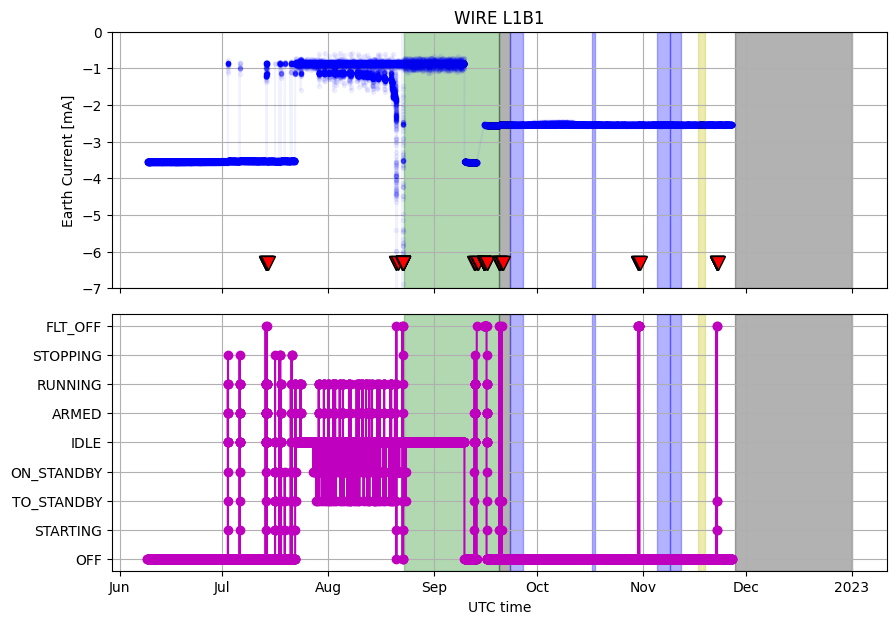

In [21]:
wire_name = 'L1B1'
wire_pc = 'RPMC.UL14.RBBCW.L1B1:I_EARTH_PCNT'
wire_wic = 'RBBCW.L1B1:ST_FAILURE_WIC'
wire_state = 'RPMC.UL14.RBBCW.L1B1:STATE'


fig = plt.figure(figsize=[10,7])
gs = fig.add_gridspec(2, hspace=0.1)
axs = gs.subplots(sharex=True)

my_data = wire_pc
df = pd.read_parquet('BBLR I_Earth Monitoring.parquet',columns=[my_data, 'HX:FILLN']).sort_index().loc[
    int(pd.Timestamp('2022-06').timestamp()*1e9):int(pd.Timestamp('2022-12').timestamp()*1e9)]

df = df[my_data].dropna().iloc[0::100]/10000*50
nx.pandas_index_localize(df);
axs[0].plot(df, 'b.-', alpha=.05)
axs[0].set_ylim(-7,0)
axs[0].set_ylabel('Earth Current [mA]')
axs[0].grid(True)
locator = md.AutoDateLocator()
xfmt = md.DateFormatter('%m/%d')
xfmt = md.ConciseDateFormatter(locator)

axs[0].xaxis.set_major_formatter(xfmt)
axs[0].set_title(f'WIRE {wire_name}')

my_data = wire_wic
df = pd.read_parquet('BBLR I_Earth Monitoring.parquet',columns=[my_data]).sort_index().loc[
        int(pd.Timestamp('2022-06').timestamp()*1e9):int(pd.Timestamp('2022-12').timestamp()*1e9)].dropna()
nx.pandas_index_localize(df)

for x in df[df==0].index:
    axs[0].plot(x,axs[0].get_ylim()[0]+.1*(-axs[0].get_ylim()[0]+axs[0].get_ylim()[1]), 'vr', ms=10, mec='k')

my_data = wire_state
df = pd.read_parquet('BBLR I_Earth Monitoring.parquet',columns=[my_data]).sort_index().loc[
    int(pd.Timestamp('2022-06').timestamp()*1e9):
    int(pd.Timestamp('2022-12').timestamp()*1e9)].dropna()
nx.pandas_index_localize(df)
axs[1].step(df[my_data].index, df[my_data].values, where = 'post', marker='o', color='m')
axs[1].grid(True)
axs[1].set_xlabel('UTC time')

def plot_schedule(axs):
    # https://indico.cern.ch/event/1194548/contributions/5093907/attachments/2560485/4413186/LHCFeedback.pdf
    for ax in axs:
        #ax.axvspan(pd.Timestamp('2022-08-04'),pd.Timestamp('2022-08-23'), color= 'r', alpha=.3) # Collision >1200b
        ax.axvspan(pd.Timestamp('2022-08-23'),pd.Timestamp('2022-09-20'), color= 'g', alpha=.3) # RF problem
        ax.axvspan(pd.Timestamp('2022-09-20'),pd.Timestamp('2022-09-23'), color= 'k', alpha=.3) # RF problem
        ax.axvspan(pd.Timestamp('2022-11-28'),pd.Timestamp('2023-01'), color= 'k', alpha=.3) #YETS

        #MD and special
        ax.axvspan(pd.Timestamp('2022-10-17'),pd.Timestamp('2022-10-18'), color= 'b', alpha=.3)
        ax.axvspan(pd.Timestamp('2022-11-5'),pd.Timestamp('2022-11-9'), color= 'b', alpha=.3) 
        ax.axvspan(pd.Timestamp('2022-09-23'),pd.Timestamp('2022-09-27'), color= 'b', alpha=.3) # Special run LHCf
        ax.axvspan(pd.Timestamp('2022-11-09'),pd.Timestamp('2022-11-12'), color= 'b', alpha=.3) # Special run vdM

        #ION
        ax.axvspan(pd.Timestamp('2022-11-17'),pd.Timestamp('2022-11-19'), color= 'y', alpha=.3) 

plot_schedule(axs)
plt.savefig(f'./figures/{wire_name}.png', dpi=300)
df[df[my_data]=='FLT_OFF']

RPMC.USC55.RBBCW.L5B1:STATE
2022-07-02 14:57:56.080000+00:00                    STOPPING
2022-07-06 00:28:23.580000+00:00                    STOPPING
2022-07-16 09:12:01.100000+00:00                    STOPPING
2022-07-17 16:24:34.100000+00:00                    STOPPING
2022-07-17 17:32:59.600000+00:00                    STOPPING
2022-07-17 18:51:43.100000+00:00                    STOPPING
2022-07-17 21:19:24.100000+00:00                    STOPPING
2022-07-21 05:07:41.100000+00:00                    STOPPING
2022-07-21 05:08:59.100000+00:00                    STOPPING
2022-08-22 16:20:22.600000+00:00                    STOPPING
2022-09-12 17:39:34.600000+00:00                    STOPPING
2022-09-16 05:48:42.100000+00:00                    STOPPING
2022-09-20 01:06:21.100000+00:00                    STOPPING
2022-11-22 11:19:56.600000+00:00                    STOPPING

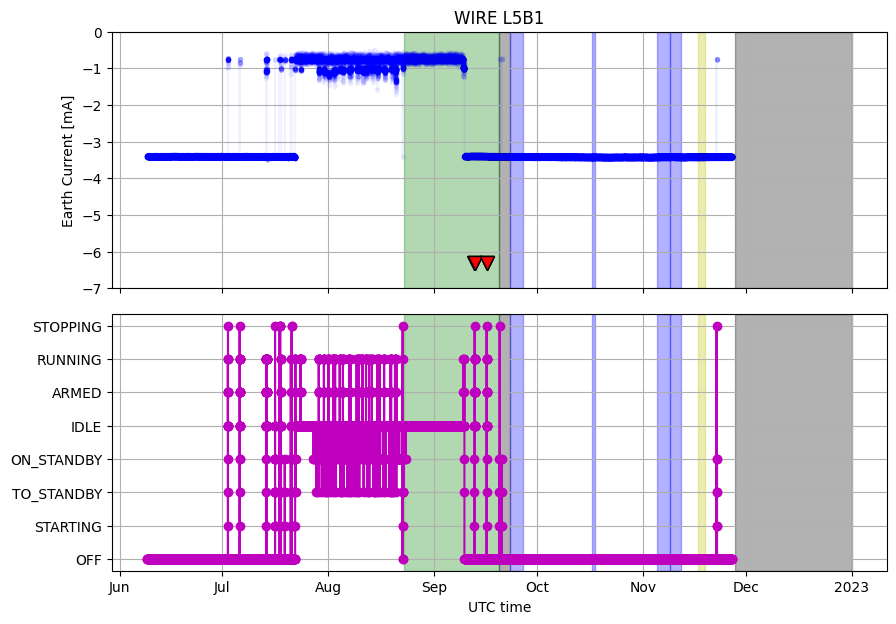

In [22]:
wire_name = 'L5B1'
wire_pc = 'RPMC.USC55.RBBCW.L5B1:I_EARTH_PCNT'
wire_wic = 'RBBCW.L5B1:ST_FAILURE_WIC'
wire_state = 'RPMC.USC55.RBBCW.L5B1:STATE'


fig = plt.figure(figsize=[10,7])
gs = fig.add_gridspec(2, hspace=0.1)
axs = gs.subplots(sharex=True)

my_data = wire_pc
df = pd.read_parquet('BBLR I_Earth Monitoring.parquet',columns=[my_data, 'HX:FILLN']).sort_index().loc[
    int(pd.Timestamp('2022-06').timestamp()*1e9):int(pd.Timestamp('2022-12').timestamp()*1e9)]

df = df[my_data].dropna().iloc[0::100]/10000*50
nx.pandas_index_localize(df);
axs[0].plot(df, 'b.-', alpha=.05)
axs[0].set_ylim(-7,0)
axs[0].set_ylabel('Earth Current [mA]')
axs[0].grid(True)
locator = md.AutoDateLocator()
xfmt = md.DateFormatter('%m/%d')
xfmt = md.ConciseDateFormatter(locator)

axs[0].xaxis.set_major_formatter(xfmt)
axs[0].set_title(f'WIRE {wire_name}')

my_data = wire_wic
df = pd.read_parquet('BBLR I_Earth Monitoring.parquet',columns=[my_data]).sort_index().loc[
        int(pd.Timestamp('2022-06').timestamp()*1e9):int(pd.Timestamp('2022-12').timestamp()*1e9)].dropna()
nx.pandas_index_localize(df)

for x in df[df==0].index:
    axs[0].plot(x,axs[0].get_ylim()[0]+.1*(-axs[0].get_ylim()[0]+axs[0].get_ylim()[1]), 'vr', ms=10, mec='k')

my_data = wire_state
df = pd.read_parquet('BBLR I_Earth Monitoring.parquet',columns=[my_data]).sort_index().loc[
    int(pd.Timestamp('2022-06').timestamp()*1e9):
    int(pd.Timestamp('2022-12').timestamp()*1e9)].dropna()
nx.pandas_index_localize(df)
axs[1].step(df[my_data].index, df[my_data].values, where = 'post', marker='o', color='m')
axs[1].grid(True)
axs[1].set_xlabel('UTC time')
plot_schedule(axs)

plt.savefig(f'./figures/{wire_name}.png', dpi=300)
df[df[my_data]=='STOPPING']

RPMC.UL16.RBBCW.R1B2:STATE
2022-07-19 05:01:31.100000+00:00                    FLT_OFF
2022-07-20 23:37:23.100000+00:00                    FLT_OFF
2022-07-21 05:08:03.600000+00:00                    FLT_OFF
2022-07-22 06:08:14.100000+00:00                    FLT_OFF
2022-11-16 09:00:16.600000+00:00                    FLT_OFF
2022-11-18 01:51:40.600000+00:00                    FLT_OFF
2022-11-18 03:39:59.600000+00:00                    FLT_OFF
2022-11-18 04:39:59.600000+00:00                    FLT_OFF
2022-11-18 05:55:24.100000+00:00                    FLT_OFF

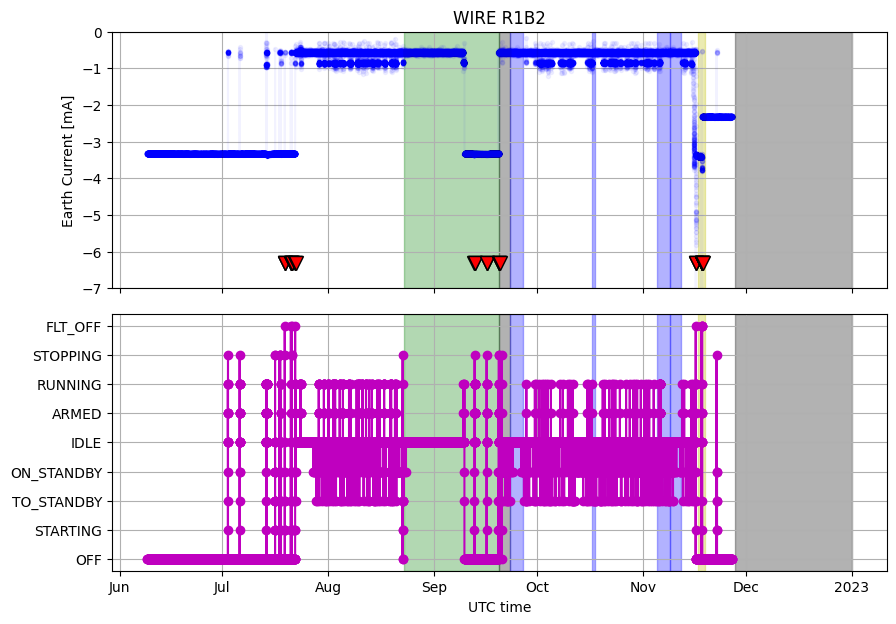

In [23]:
wire_name = 'R1B2'
wire_pc = 'RPMC.UL16.RBBCW.R1B2:I_EARTH_PCNT'
wire_wic = 'RBBCW.R1B2:ST_FAILURE_WIC'
wire_state = 'RPMC.UL16.RBBCW.R1B2:STATE'


fig = plt.figure(figsize=[10,7])
gs = fig.add_gridspec(2, hspace=0.1)
axs = gs.subplots(sharex=True)

my_data = wire_pc
df = pd.read_parquet('BBLR I_Earth Monitoring.parquet',columns=[my_data, 'HX:FILLN']).sort_index().loc[
    int(pd.Timestamp('2022-06').timestamp()*1e9):int(pd.Timestamp('2022-12').timestamp()*1e9)]

df = df[my_data].dropna().iloc[0::100]/10000*50
nx.pandas_index_localize(df);
axs[0].plot(df, 'b.-', alpha=.05)
axs[0].set_ylim(-7,0)
axs[0].set_ylabel('Earth Current [mA]')
axs[0].grid(True)
locator = md.AutoDateLocator()
xfmt = md.DateFormatter('%m/%d')
xfmt = md.ConciseDateFormatter(locator)

axs[0].xaxis.set_major_formatter(xfmt)
axs[0].set_title(f'WIRE {wire_name}')

my_data = wire_wic
df = pd.read_parquet('BBLR I_Earth Monitoring.parquet',columns=[my_data]).sort_index().loc[
        int(pd.Timestamp('2022-06').timestamp()*1e9):int(pd.Timestamp('2022-12').timestamp()*1e9)].dropna()
nx.pandas_index_localize(df)

for x in df[df==0].index:
    axs[0].plot(x,axs[0].get_ylim()[0]+.1*(-axs[0].get_ylim()[0]+axs[0].get_ylim()[1]), 'vr', ms=10, mec='k')

my_data = wire_state
df = pd.read_parquet('BBLR I_Earth Monitoring.parquet',columns=[my_data]).sort_index().loc[
    int(pd.Timestamp('2022-06').timestamp()*1e9):
    int(pd.Timestamp('2022-12').timestamp()*1e9)].dropna()
nx.pandas_index_localize(df)
axs[1].step(df[my_data].index, df[my_data].values, where = 'post', marker='o', color='m')
axs[1].grid(True)
axs[1].set_xlabel('UTC time')
plot_schedule(axs)

plt.savefig(f'./figures/{wire_name}.png', dpi=300)
df[df[my_data]=='FLT_OFF']

RPMC.UL557.RBBCW.R5B2:STATE
2022-09-20 14:49:30.620000+00:00                     FLT_OFF

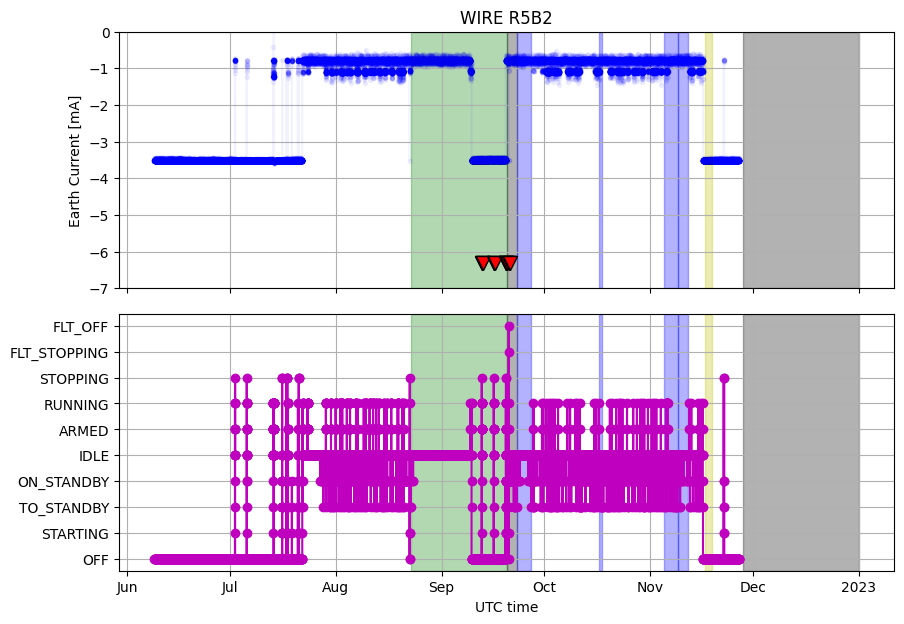

In [24]:
wire_name = 'R5B2'
wire_pc = 'RPMC.UL557.RBBCW.R5B2:I_EARTH_PCNT'
wire_wic = 'RBBCW.R5B2:ST_FAILURE_WIC'
wire_state = 'RPMC.UL557.RBBCW.R5B2:STATE'


fig = plt.figure(figsize=[10,7])
gs = fig.add_gridspec(2, hspace=0.1)
axs = gs.subplots(sharex=True)

my_data = wire_pc
df = pd.read_parquet('BBLR I_Earth Monitoring.parquet',columns=[my_data, 'HX:FILLN']).sort_index().loc[
    int(pd.Timestamp('2022-06').timestamp()*1e9):int(pd.Timestamp('2022-12').timestamp()*1e9)]

df = df[my_data].dropna().iloc[0::100]/10000*50
nx.pandas_index_localize(df);
axs[0].plot(df, 'b.-', alpha=.05)
axs[0].set_ylim(-7,0)
axs[0].set_ylabel('Earth Current [mA]')
axs[0].grid(True)
locator = md.AutoDateLocator()
xfmt = md.DateFormatter('%m/%d')
xfmt = md.ConciseDateFormatter(locator)

axs[0].xaxis.set_major_formatter(xfmt)
axs[0].set_title(f'WIRE {wire_name}')

my_data = wire_wic
df = pd.read_parquet('BBLR I_Earth Monitoring.parquet',columns=[my_data]).sort_index().loc[
        int(pd.Timestamp('2022-06').timestamp()*1e9):int(pd.Timestamp('2022-12').timestamp()*1e9)].dropna()
nx.pandas_index_localize(df)

for x in df[df==0].index:
    axs[0].plot(x,axs[0].get_ylim()[0]+.1*(-axs[0].get_ylim()[0]+axs[0].get_ylim()[1]), 'vr', ms=10, mec='k')

my_data = wire_state
df = pd.read_parquet('BBLR I_Earth Monitoring.parquet',columns=[my_data]).sort_index().loc[
    int(pd.Timestamp('2022-06').timestamp()*1e9):
    int(pd.Timestamp('2022-12').timestamp()*1e9)].dropna()
nx.pandas_index_localize(df)
axs[1].step(df[my_data].index, df[my_data].values, where = 'post', marker='o', color='m')
axs[1].grid(True)
axs[1].set_xlabel('UTC time')
plot_schedule(axs)

plt.savefig(f'./figures/{wire_name}.png', dpi=300)
df[df[my_data]=='FLT_OFF']